Gabriel Marcelino \
Week 1 Tuesday Exercise \
Perceptron for Binary Classification \
Used Coursera course(Supervised Machine Learning: Regression and Classification) as source for data and part of code \


1. Load data

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# x contains features
# y contains labels (0 or 1)
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5], [1.5, 1.5]])
y = np.array([0, 0, 0, 1, 1, 1, 0]).reshape(-1,1) 


2. Plot Data to Better visualize

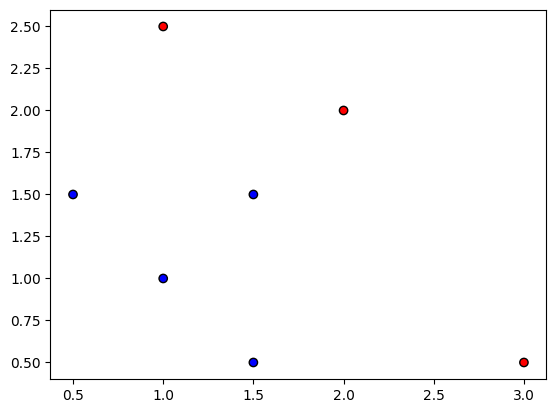

In [94]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.show()


3. Perceptron Training


In [95]:
def perceptron(X, y, learning_rate=0.1):
    weights = np.zeros(X.shape[1])
    bias = 0
    epochs = 50

    #  Training algorithm
    for epoch in range(epochs):
        for i in range(len(X)):
            linear_output = np.dot(X[i], weights) + bias
            prediction = 1 if linear_output > 0 else 0

            # Update weights and bias if prediction is wrong
            error = y[i] - prediction
            update = learning_rate * error
            weights += update * X[i]
            bias += update
    return weights, bias
    
weights, bias = perceptron(X, y)
print("Trained weights:", weights)
print("Trained bias:", bias)

Trained weights: [0.3  0.25]
Trained bias: [-0.9]


4. Test

In [96]:
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return np.where(linear_output > 0, 1, 0)

# Predict using the trained weights and bias
predictions = predict(X, weights, bias)

# Compare predictions with actual labels
print("Predictions:", predictions)
print("Actual labels:", y.flatten())

# Calculate accuracy
accuracy = np.mean(predictions == y.flatten()) * 100
print(f"Accuracy: {accuracy}%")

Predictions: [0 0 0 1 1 1 0]
Actual labels: [0 0 0 1 1 1 0]
Accuracy: 100.0%


5. Plot decision boundary


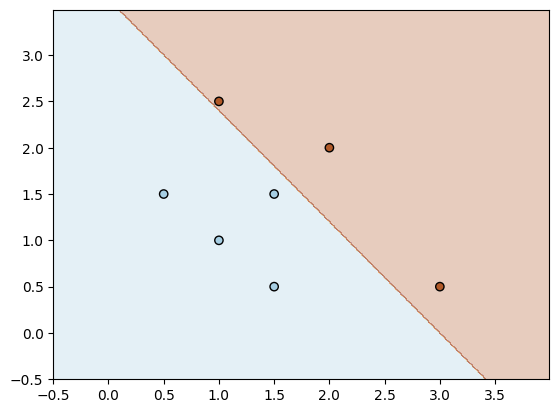

In [97]:
# Define the range for the grid based on the minimum and maximum values of the first and second features
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Expanding the range for Feature 1 (x-axis)
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Expanding the range for Feature 2 (y-axis)

# Create a grid of points with a small step size (0.01) to cover the entire feature space
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Flatten the grid into a list of points and predict the class for each point in the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]  # Combine the x and y coordinates into grid points
Z = predict(grid_points, weights, bias)  # Predict the class for each grid point
Z = Z.reshape(xx.shape)  # Reshape the predictions to match the grid

# Plot the decision boundary using the predictions (Z) for the grid points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)  # Plot the decision boundary as filled regions

# Plot the original data points with their actual class labels
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolor='k', cmap=plt.cm.Paired)  # Actual data points
plt.show()  # Display the plot
